In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('/content/Heart Dieases Dataset.csv')

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop("target", axis=1)
y = data["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


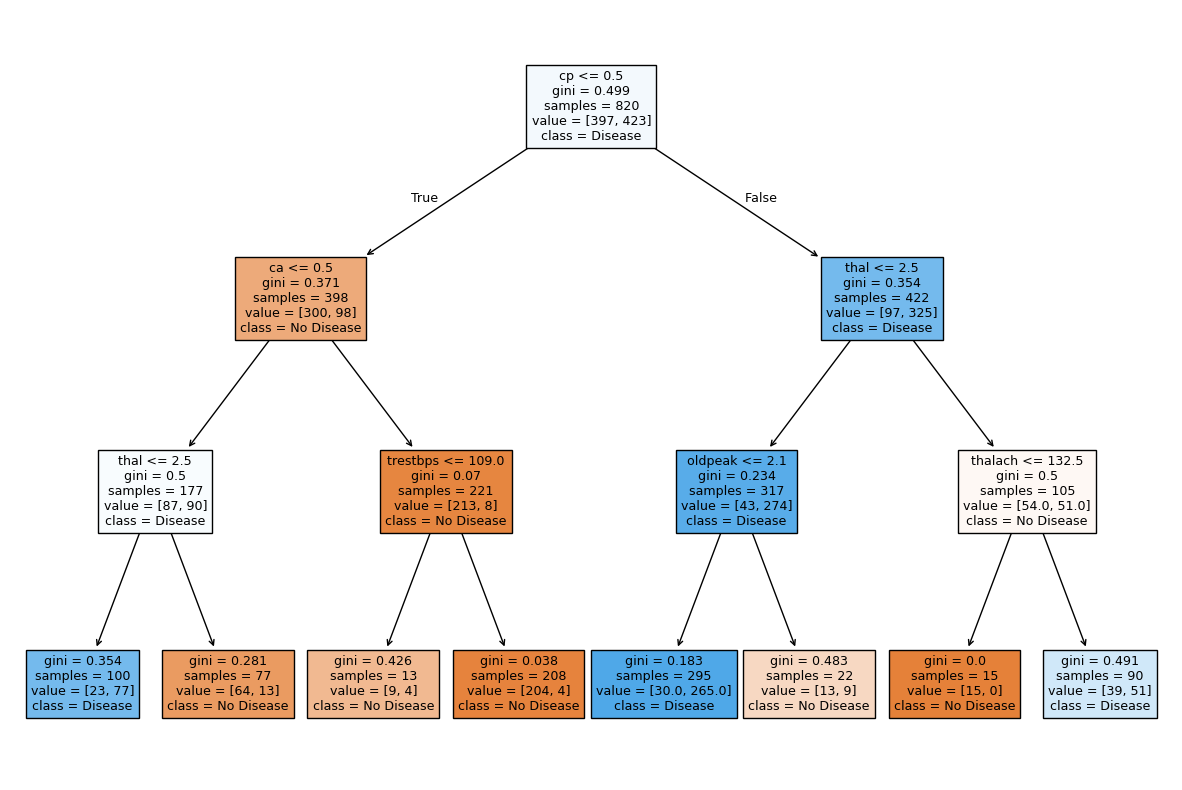

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Depth {depth}: Train Acc = {train_acc:.2f}, Test Acc = {test_acc:.2f}")


Depth 1: Train Acc = 0.76, Test Acc = 0.75
Depth 2: Train Acc = 0.77, Test Acc = 0.68
Depth 3: Train Acc = 0.85, Test Acc = 0.78
Depth 4: Train Acc = 0.88, Test Acc = 0.80
Depth 5: Train Acc = 0.93, Test Acc = 0.84
Depth 6: Train Acc = 0.95, Test Acc = 0.88
Depth 7: Train Acc = 0.97, Test Acc = 0.92
Depth 8: Train Acc = 0.99, Test Acc = 0.98
Depth 9: Train Acc = 1.00, Test Acc = 0.98
Depth 10: Train Acc = 1.00, Test Acc = 0.99


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.99


In [15]:
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)



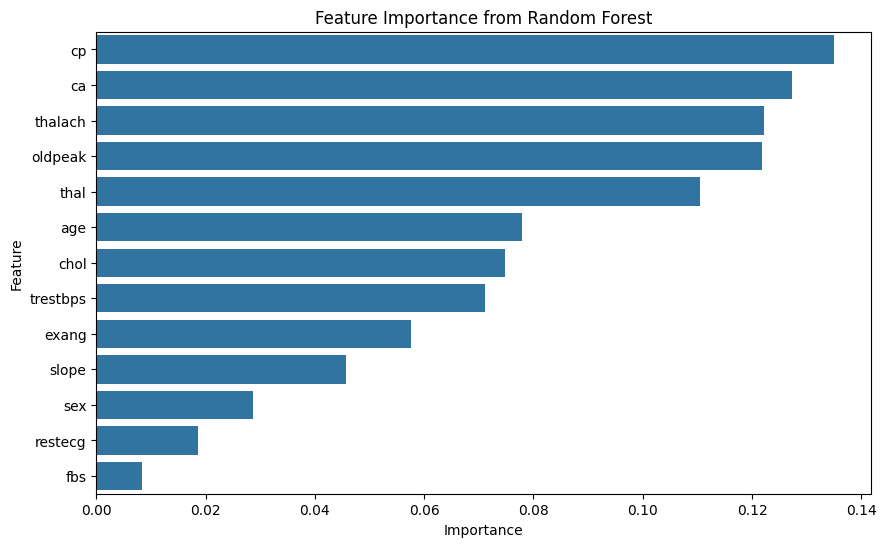

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x="Importance", y="Feature")
plt.title("Feature Importance from Random Forest")
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-Validation Accuracy: 1.00 ± 0.01
